# Importing Modules

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import subprocess
from sklearn import tree
from os import system
from IPython.display import SVG
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.metrics import accuracy_score

# Reading dataset

In [3]:
def read_dataset():
    df = pd.read_csv("D:\Python\sonar_all-data.csv")# Reading input sheet with read_csv method
    X=df.iloc[:,0:60]
    y=df.iloc[:,-1]
    #Encode the independent variable 
    encoder=LabelEncoder()
    encoder.fit(y)
    Y=encoder.transform(y)
    return(X,Y)

In [4]:
X,Y=read_dataset()

In [5]:
X,Y=shuffle(X,Y,random_state=1)

In [6]:
# # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

# Automated to find out best hyper parameters with prediction and min mse

In [20]:
# Finding min mean squared error & Confusion Matrix for train and test data with multiple max depths,min_samples_leaf,n_estimators
max_depth_array = [2,3,4,5]
max_features_array = [2,3,4,5,6,7,8]
n_estimators_array = [10,20,30,40,50,60,70,80,90,100]
sample_weight_array= [1,2,3,4,5,6,7,8]


for x in max_depth_array:
    for y in max_features_array:
        for z in n_estimators_array:
            for w in sample_weight_array:
                gradientBoosting_classifier = GradientBoostingClassifier(
                    learning_rate=0.05,
                    n_estimators=z,
                    max_depth=x,
                    random_state=1,
                    max_features=y)
            
                gb=gradientBoosting_classifier.fit(X_train, y_train)
                y_pred = gb.predict(X_train)

                print("max_depth,min_samples_leaf,n_estimator -: ",x,'-',y,'-',z,'-',w)
                MSE = np.square(np.subtract(y_train,y_pred)).mean() 
                print(MSE)
    #             print(confusion_matrix(y_train, y_pred))

max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 1
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 2
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 3
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 4
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 5
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 6
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 7
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 8
0.18055555555555555
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 1
0.1111111111111111
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 2
0.1111111111111111
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 3
0.1111111111111111
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 4
0.1111111111111111
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 5
0.11111111

Min mean Square error and better prediction & confusion matrix

max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 90 - 1

MSE -  0.0

Confusion Matrix

[[80  0]

 [ 0 64]]

max_depth,min_samples_leaf,n_estimator -:  5 - 8 - 100 - 8
Min Mean squared error -  0.0
Accuracy score:  1.0
(144,)


Text(0.5,1,'Random Forest Classifier \n Confusion Matrix')

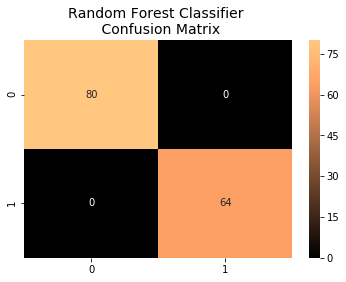

In [19]:
gradientBoosting_classifier = GradientBoostingClassifier(
                    learning_rate=0.05,
                    n_estimators=90,
                    max_depth=2,
                    random_state=1,
                    max_features=2)
            
gb=gradientBoosting_classifier.fit(X_train, y_train)
y_pred = gb.predict(X_train)

print("max_depth,min_samples_leaf,n_estimator -: ",x,'-',y,'-',z,'-',w)
MSE = np.square(np.subtract(y_train,y_pred)).mean() 
print('Min Mean squared error - ',MSE)
rf_cf=confusion_matrix(y_train, y_pred)
print("Accuracy score: ", accuracy_score(y_train,y_pred))
print(y_train.shape)
sns.heatmap(rf_cf,annot=True, cmap=plt.cm.copper)
plt.title('Random Forest Classifier \n Confusion Matrix', fontsize=14)